In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 878.7 kB/s eta 0:00:00


In [ ]:
df_class = pd.read_excel("CapstoneData.xlsx",  sheet_name='anonclass', header=0)


In [ ]:
df_spend = pd.read_excel("CapstoneData.xlsx",  sheet_name='anonspend', header=0)

In [ ]:
print(df_class.head())
print(df_spend.head())

   Customer  Control Tier  Course Time  People Goal Course Group  Target  \
0         1        1  Red    1038    A         54.0     Advanced  Role M   
1         1        1  Red    1045    A         54.0     Advanced  Role H   
2         1        1  Red    1072    A         27.0     Advanced  Role D   
3         1        1  Red    1314    B        300.0     Advanced  Role A   
4         1        1  Red    1408    B         25.0     Advanced  Role H   

   Customer Type  People  
0  Invertebrates       1  
1  Invertebrates       1  
2  Invertebrates       1  
3  Invertebrates       1  
4  Invertebrates       2  
   Customer Time  Location    Business Spend Group  Spend Index T Shirt Size
0         1    A  Ismorada  Serpentine        Fish            1        Micro
1         1    A  Ismorada  Serpentine        Meat            1        Micro
2         1    A  Ismorada  Serpentine        Fish            1        Micro
3         1    A  Ismorada  Serpentine      Grains            1        Mi

In [ ]:
print(df_class['Course'].nunique())

2577


In [ ]:

# Count the occurrences of each course
course_counts = df_class['Course'].value_counts()

# Select the top 10 courses by occurrences
top_10_courses = course_counts.head(10)

# Create a pie chart for the top 10 courses
fig = px.pie(names=top_10_courses.index, values=top_10_courses.values, title='Top 10 Courses by Occurrences')

# Show the pie chart
fig.show()



In [ ]:

# Convert the 'Course' column to string data type
df_class['Course'] = df_class['Course'].astype(str)

# Count the occurrences of each course
course_counts = df_class['Course'].value_counts()

# Sort the courses by occurrences in descending order
course_counts_sorted = course_counts.sort_values(ascending=False)

# Select the top 10 courses by occurrences
top_10_courses = course_counts_sorted.head(10)

# Reverse the order of the DataFrame
top_10_courses = top_10_courses.iloc[::-1]

# Reset the index to have 'Course' as a column
top_10_courses = top_10_courses.reset_index()

# Rename the columns
top_10_courses.columns = ['Course', 'Occurrences']

# Create a horizontal bar plot for the top 10 courses
fig = px.bar(top_10_courses, x='Occurrences', y='Course', orientation='h', title='Top 10 Courses by Occurrences')
fig.show()


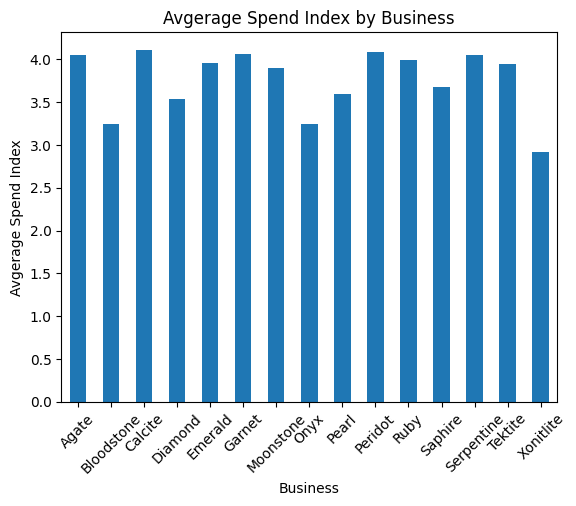

In [ ]:
sum_spend_index = df_spend.groupby('Business')['Spend Index'].mean()

# Plotting
sum_spend_index.plot(kind='bar')
plt.xlabel('Business')
plt.ylabel('Avgerage Spend Index')
plt.title('Avgerage Spend Index by Business')
plt.xticks(rotation=45)
plt.show()

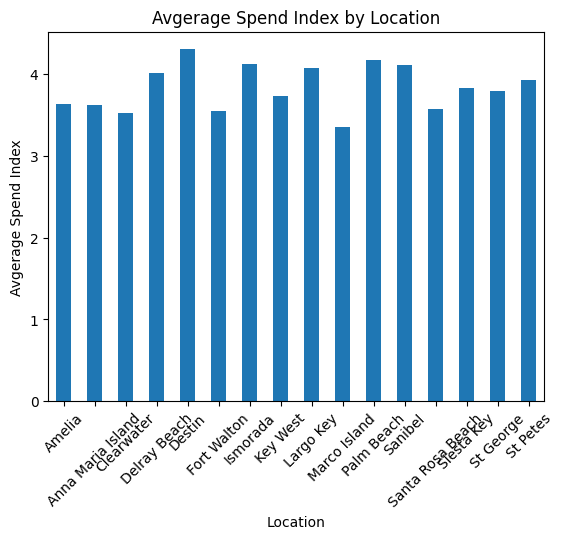

In [ ]:
sum_spend_index = df_spend.groupby('Location')['Spend Index'].mean()

# Plotting
sum_spend_index.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Avgerage Spend Index')
plt.title('Avgerage Spend Index by Location')
plt.xticks(rotation=45)
plt.show()

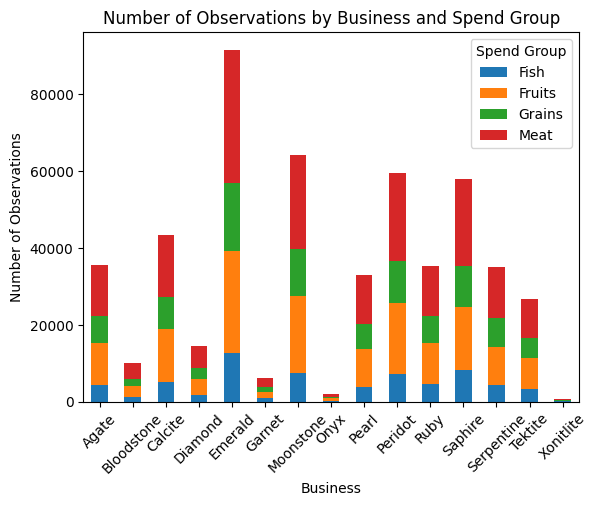

In [ ]:
# Group by Business and Spend Group and count observations
grouped_counts = df_spend.groupby(['Business', 'Spend Group']).size().unstack()

# Plotting
grouped_counts.plot(kind='bar', stacked=True)
plt.xlabel('Business')
plt.ylabel('Number of Observations')
plt.title('Number of Observations by Business and Spend Group')
plt.xticks(rotation=45)
plt.legend(title='Spend Group')
plt.show()

In [ ]:
# Convert the DataFrame to long format for Plotly
grouped_percentages_long = grouped_percentages.reset_index().melt(id_vars='Business', var_name='Spend Group', value_name='Percentage')

# Plotting with Plotly
fig = px.bar(grouped_percentages_long, x='Business', y='Percentage', color='Spend Group', barmode='stack')

# Add text annotations for percentages
for business in grouped_percentages.index:
    previous_height = 0
    for spend_group in grouped_percentages.columns:
        height = grouped_percentages.loc[business, spend_group]
        if not pd.isnull(height):  # Check if the value is not NaN
            y_position = previous_height + height / 2
            fig.add_annotation(x=business, y=y_position, text=f"{height:.1f}%", showarrow=False, font=dict(color='white', size=10))
            previous_height += height

# Update layout
fig.update_layout(
    xaxis=dict(title='Business', tickangle=45),
    yaxis=dict(title='Percentage of Observations'),
    title='Percentage of Spend Group by Business',
    legend_title='Spend Group'
)

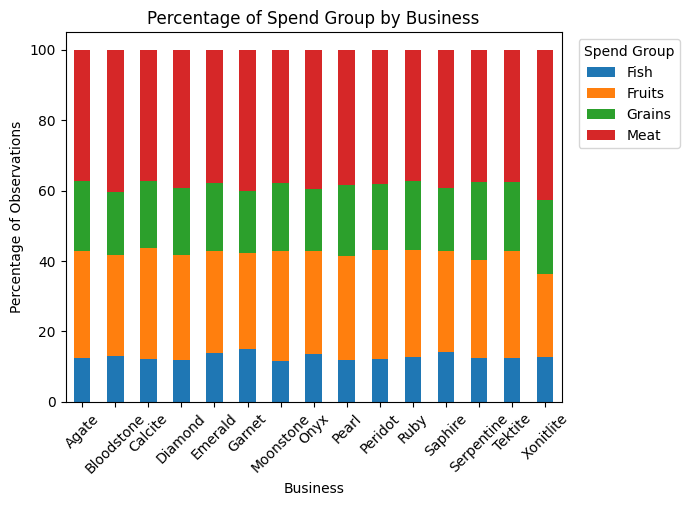

In [ ]:
# Calculate percentage for each Spend Group within each Business
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Plotting

grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Business')
plt.ylabel('Percentage of Observations')
plt.title('Percentage of Spend Group by Business')
plt.xticks(rotation=45)
plt.legend(title='Spend Group', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

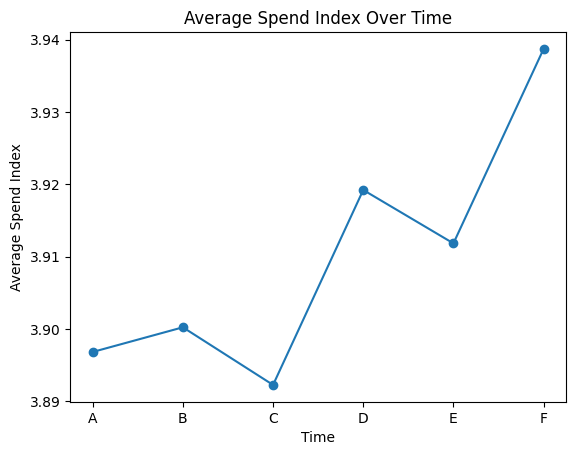

In [ ]:
# Group by Time and calculate average spend index
average_spend_index = df_spend.groupby('Time')['Spend Index'].mean()

# Plotting
plt.plot(average_spend_index.index, average_spend_index.values, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Average Spend Index')
plt.title('Average Spend Index Over Time')
plt.show()

## **Data Aggregation**

**Anoclass**

In [ ]:
n = len(pd.unique(df_class['Customer']))

print("No.of.unique values :", n)

No.of.unique values : 1699


In [ ]:
nan_values = df_class.isna()
# Count NaN values in each column
nan_counts = df_class.isna().sum()

print(nan_counts)

Customer            0
Control             0
Tier             1211
Course              0
Time                0
People Goal       229
Course Group        0
Target              0
Customer Type     380
People              0
dtype: int64


In [ ]:
df_class['Tier'].fillna('Unknown', inplace=True)

In [ ]:
nan_values = df_class.isna()
# Count NaN values in each column
nan_counts = df_class.isna().sum()

print(nan_counts)

Customer           0
Control            0
Tier               0
Course             0
Time               0
People Goal      229
Course Group       0
Target             0
Customer Type    380
People             0
dtype: int64


In [ ]:
# Columns to check for uniqueness
columns_to_check = ["Control", "Tier", "Customer Type"]

# Check uniqueness for each specified column
for column in columns_to_check:
    unique_counts = df_class.groupby(["Customer", "Time"])[column].nunique()
    all_unique = unique_counts.eq(1).all()
    if all_unique:
        print(f"All customers belong to only one type of {column}.")
    else:
        print(f"Some customers belong to more than one type of {column}.")

All customers belong to only one type of Control.
Some customers belong to more than one type of Tier.
Some customers belong to more than one type of Customer Type.


In [ ]:
# Group by Customer, Time, and Tier to identify the tier for each customer
tier_groups = df_class.groupby(['Customer', 'Time'])['Tier'].nunique().reset_index(name='Tier_Count')

# Determine the updated tier based on the number of unique tiers
tier_groups['Updated_Tier'] = tier_groups['Tier_Count'].apply(lambda x: 'Both' if x > 1 else df_class['Tier'].iloc[0])

# Group by Customer and Time to count the unique number of courses
course_counts = df_class.groupby(['Customer', 'Time', 'Control'])['Course'].nunique().reset_index(name='Course_Count')

# Calculate the average "People Goal" for each class (grouped by Customer and Time)
avg_people_goal = df_class.groupby(['Customer', 'Time'])['People Goal'].mean().reset_index(name='Avg_People_Goal')

# Merge the two datasets
result = pd.merge(tier_groups[['Customer', 'Time', 'Updated_Tier']], course_counts, on=['Customer', 'Time'], how='inner')
result = pd.merge(result, avg_people_goal, on=['Customer', 'Time'], how='inner')

# Display the resulting DataFrame
print(result)


      Customer Time Updated_Tier  Control  Course_Count  Avg_People_Goal
0            1    A          Red        1             3             45.0
1            1    B          Red        1             4            101.5
2            1    C          Red        1             5             44.8
3            1    D          Red        1             8             70.5
4            1    E          Red        1             6             77.0
...        ...  ...          ...      ...           ...              ...
7075      1696    D          Red        0             2            162.5
7076      1697    A          Red        0             1             40.0
7077      1698    B          Red        0             1             70.0
7078      1699    E          Red        0             3            109.0
7079      1699    F          Red        0             1             25.0

[7080 rows x 6 columns]


In [ ]:
# Group by Customer, Time, and Tier to identify the tier for each customer
tier_groups = df_class.groupby(['Customer', 'Time'])['Tier'].nunique().reset_index(name='Tier_Count')

# Determine the updated tier based on the number of unique tiers
tier_groups['Updated_Tier'] = tier_groups['Tier_Count'].apply(lambda x: 'Both' if x > 1 else df_class['Tier'].iloc[0])

# Group by Customer and Time to count the unique number of courses
course_counts = df_class.groupby(['Customer', 'Time'])['Course'].nunique().reset_index(name='Course_Count')

# Calculate the average "People Goal" for each class (grouped by Customer and Time)
avg_people_goal = df_class.groupby(['Customer', 'Time'])['People Goal'].mean().reset_index(name='Avg_People_Goal')

# Group by Customer and Time to count the number of courses in each course group
course_group_counts = df_class.groupby(['Customer', 'Time', 'Course Group']).size().unstack(fill_value=0).reset_index()

# Merge the datasets
result = pd.merge(tier_groups[['Customer', 'Time', 'Updated_Tier']], course_counts, on=['Customer', 'Time'], how='inner')
result = pd.merge(result, avg_people_goal, on=['Customer', 'Time'], how='inner')
result = pd.merge(result, course_group_counts, on=['Customer', 'Time'], how='inner')

# Display the resulting DataFrame
print(result)


      Customer Time Updated_Tier  Course_Count  Avg_People_Goal  Advanced  \
0            1    A          Red             3             45.0         3   
1            1    B          Red             4            101.5         4   
2            1    C          Red             5             44.8         5   
3            1    D          Red             8             70.5         8   
4            1    E          Red             6             77.0         6   
...        ...  ...          ...           ...              ...       ...   
7075      1696    D          Red             2            162.5         2   
7076      1697    A          Red             1             40.0         1   
7077      1698    B          Red             1             70.0         1   
7078      1699    E          Red             3            109.0         3   
7079      1699    F          Red             1             25.0         1   

      Basic  General  
0         0        0  
1         0        0  
2     

In [ ]:
# Merge the result back to the 'result' DataFrame using a left join
result = pd.merge(result, customer_type_mode, on=['Customer', 'Time'], how='left')

# Fill missing values in 'Customer Type' with a random mode
result['Customer Type'] = result['Customer Type'].fillna(result['Customer Type'].sample(n=1).values[0])

# Print the updated DataFrame
print(result)


      Customer Time Updated_Tier  Course_Count  Avg_People_Goal  Advanced  \
0            1    A          Red             3             45.0         3   
1            1    B          Red             4            101.5         4   
2            1    C          Red             5             44.8         5   
3            1    D          Red             8             70.5         8   
4            1    E          Red             6             77.0         6   
...        ...  ...          ...           ...              ...       ...   
7075      1696    D          Red             2            162.5         2   
7076      1697    A          Red             1             40.0         1   
7077      1698    B          Red             1             70.0         1   
7078      1699    E          Red             3            109.0         3   
7079      1699    F          Red             1             25.0         1   

      Basic  General  Customer Type  
0         0        0  Invertebrates  

In [ ]:
# Group by Customer, Time, and Target to count the number of occurrences of each target
target_counts = df_class.groupby(['Customer', 'Time', 'Target']).size().unstack(fill_value=0).reset_index()

# Merge the target counts with the result DataFrame
result = pd.merge(result, target_counts, on=['Customer', 'Time'], how='left')


# Print the updated DataFrame
print(result)


      Customer Time Updated_Tier  Course_Count  Avg_People_Goal  Advanced  \
0            1    A          Red             3             45.0         3   
1            1    B          Red             4            101.5         4   
2            1    C          Red             5             44.8         5   
3            1    D          Red             8             70.5         8   
4            1    E          Red             6             77.0         6   
...        ...  ...          ...           ...              ...       ...   
7075      1696    D          Red             2            162.5         2   
7076      1697    A          Red             1             40.0         1   
7077      1698    B          Red             1             70.0         1   
7078      1699    E          Red             3            109.0         3   
7079      1699    F          Red             1             25.0         1   

      Basic  General  Customer Type  Role A  ...  Role D  Role E  Role F  \

In [ ]:
# Calculate the average number of people for each class (grouped by Customer and Time)
avg_people = df_class.groupby(['Customer', 'Time'])['People'].mean().reset_index(name='Avg_People')

# Merge the average people with the result DataFrame
result = pd.merge(result, avg_people, on=['Customer', 'Time'], how='left')

# Print the updated DataFrame
print(result)


      Customer Time Updated_Tier  Course_Count  Avg_People_Goal  Advanced  \
0            1    A          Red             3             45.0         3   
1            1    B          Red             4            101.5         4   
2            1    C          Red             5             44.8         5   
3            1    D          Red             8             70.5         8   
4            1    E          Red             6             77.0         6   
...        ...  ...          ...           ...              ...       ...   
7075      1696    D          Red             2            162.5         2   
7076      1697    A          Red             1             40.0         1   
7077      1698    B          Red             1             70.0         1   
7078      1699    E          Red             3            109.0         3   
7079      1699    F          Red             1             25.0         1   

      Basic  General  Customer Type  Role A  ...  Role E  Role F  Role G  \

In [ ]:
result.to_csv('df_class_agg.csv', index=False)
from google.colab import files
files.download('df_class_agg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Anospend**

In [ ]:
n = len(pd.unique(df_spend['Customer']))

print("No.of.unique values :", n)

No.of.unique values : 1598


In [ ]:
nan_values = df_spend.isna()
# Count NaN values in each column
nan_counts = df_spend.isna().sum()

print(nan_counts)

Customer        0
Time            0
Location        0
Business        0
Spend Group     0
Spend Index     0
T Shirt Size    0
dtype: int64


In [ ]:
# Columns to check for uniqueness
columns_to_check = ["Location", "Business"]

# Check uniqueness for each specified column
for column in columns_to_check:
    unique_counts = df_spend.groupby(["Customer", "Time"])[column].nunique()
    all_unique = unique_counts.eq(1).all()
    if all_unique:
        print(f"All customers belong to only one type of {column}.")
    else:
        print(f"Some customers belong to more than one type of {column}.")

All customers belong to only one type of Location.
All customers belong to only one type of Business.


In [ ]:
df_spend.head()

,Customer,Time,Location,Business,Spend Group,Spend Index,T Shirt Size
0,1,A,Ismorada,Serpentine,Fish,1,Micro
1,1,A,Ismorada,Serpentine,Meat,1,Micro
2,1,A,Ismorada,Serpentine,Fish,1,Micro
3,1,A,Ismorada,Serpentine,Grains,1,Micro
4,1,A,Ismorada,Serpentine,Grains,1,Micro


In [ ]:
# Group by Customer, Time, and Spend Group to count the number of occurrences of each spend group
spend_group_counts = df_spend.groupby(['Customer', 'Time', 'Spend Group']).size().unstack(fill_value=0).reset_index()

# Merge the original DataFrame with the unstacked spend_group_counts DataFrame
result_s = pd.merge(df_spend[['Customer', 'Time', 'Location', 'Business']], spend_group_counts, on=['Customer', 'Time'], how='left')

# Display the resulting DataFrame
print(result_s)



        Customer Time          Location    Business  Fish  Fruits  Grains  \
0              1    A          Ismorada  Serpentine     9      20      17   
1              1    A          Ismorada  Serpentine     9      20      17   
2              1    A          Ismorada  Serpentine     9      20      17   
3              1    A          Ismorada  Serpentine     9      20      17   
4              1    A          Ismorada  Serpentine     9      20      17   
...          ...  ...               ...         ...   ...     ...     ...   
516562      1691    B  Santa Rosa Beach   Xonitlite     0       0       0   
516563      1691    C  Santa Rosa Beach   Xonitlite     0       0       0   
516564      1691    D  Santa Rosa Beach   Xonitlite     0       0       0   
516565      1691    E  Santa Rosa Beach   Xonitlite     0       0       0   
516566      1691    F  Santa Rosa Beach   Xonitlite     0       0       0   

        Meat  
0         26  
1         26  
2         26  
3         26  


In [ ]:
# Merge the original DataFrame with the unstacked spend_group_counts DataFrame
result_s = pd.merge(df_spend[['Customer', 'Time', 'Location', 'Business']], spend_group_counts, on=['Customer', 'Time'], how='left')




      Customer Time          Location    Business  Fish  Fruits  Grains  Meat
0            1    A          Ismorada  Serpentine     9      20      17    26
1            1    B          Ismorada  Serpentine    10      21      19    28
2            1    C          Ismorada  Serpentine    10      21      19    28
3            1    D          Ismorada  Serpentine    10      21      18    28
4            1    E          Ismorada  Serpentine    11      21      18    29
...        ...  ...               ...         ...   ...     ...     ...   ...
9567      1691    B  Santa Rosa Beach   Xonitlite     0       0       0     1
9568      1691    C  Santa Rosa Beach   Xonitlite     0       0       0     1
9569      1691    D  Santa Rosa Beach   Xonitlite     0       0       0     1
9570      1691    E  Santa Rosa Beach   Xonitlite     0       0       0     1
9571      1691    F  Santa Rosa Beach   Xonitlite     0       0       0     1

[9572 rows x 8 columns]


In [ ]:
# Group by Customer, Time, Location, Business, and Spend Index to count the number of occurrences of each spend index
spend_index_counts = df_spend.groupby(['Customer', 'Time', 'Location', 'Business'])['Spend Index'].value_counts().unstack(fill_value=0).reset_index()

# Rename the 'Spend Index' columns
spend_index_counts.columns = ['Customer', 'Time', 'Location', 'Business'] + ['Spend_Index_1', 'Spend_Index_3', 'Spend_Index_5', 'Spend_Index_6', 'Spend_Index_7', 'Spend_Index_8', 'Spend_Index_10']

# Merge the original df_spend DataFrame with the unstacked spend_group_counts DataFrame
result_s = pd.merge(df_spend[['Customer', 'Time', 'Location', 'Business']], spend_group_counts, on=['Customer', 'Time'], how='left')
# Merge the original df_spend DataFrame with the unstacked spend_index_counts DataFrame
result_s = pd.merge(result_s, spend_index_counts, on=['Customer', 'Time', 'Location', 'Business'], how='left')

# Display the resulting DataFrame
print(result_s)


        Customer Time          Location    Business  Fish  Fruits  Grains  \
0              1    A          Ismorada  Serpentine     9      20      17   
1              1    A          Ismorada  Serpentine     9      20      17   
2              1    A          Ismorada  Serpentine     9      20      17   
3              1    A          Ismorada  Serpentine     9      20      17   
4              1    A          Ismorada  Serpentine     9      20      17   
...          ...  ...               ...         ...   ...     ...     ...   
516562      1691    B  Santa Rosa Beach   Xonitlite     0       0       0   
516563      1691    C  Santa Rosa Beach   Xonitlite     0       0       0   
516564      1691    D  Santa Rosa Beach   Xonitlite     0       0       0   
516565      1691    E  Santa Rosa Beach   Xonitlite     0       0       0   
516566      1691    F  Santa Rosa Beach   Xonitlite     0       0       0   

        Meat  Spend_Index_1  Spend_Index_3  Spend_Index_5  Spend_Index_6  \

In [ ]:
# Drop duplicate rows based on Customer and Time
result_s = result_s.drop_duplicates(subset=['Customer', 'Time']).reset_index(drop=True)

# Display the resulting DataFrame
print(result_s)


      Customer Time          Location    Business  Fish  Fruits  Grains  Meat  \
0            1    A          Ismorada  Serpentine     9      20      17    26   
1            1    B          Ismorada  Serpentine    10      21      19    28   
2            1    C          Ismorada  Serpentine    10      21      19    28   
3            1    D          Ismorada  Serpentine    10      21      18    28   
4            1    E          Ismorada  Serpentine    11      21      18    29   
...        ...  ...               ...         ...   ...     ...     ...   ...   
9567      1691    B  Santa Rosa Beach   Xonitlite     0       0       0     1   
9568      1691    C  Santa Rosa Beach   Xonitlite     0       0       0     1   
9569      1691    D  Santa Rosa Beach   Xonitlite     0       0       0     1   
9570      1691    E  Santa Rosa Beach   Xonitlite     0       0       0     1   
9571      1691    F  Santa Rosa Beach   Xonitlite     0       0       0     1   

      Spend_Index_1  Spend_

In [ ]:
result_s.to_csv('df_spend_agg.csv', index=False)
from google.colab import files
files.download('df_spend_agg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Merge the original df_spend DataFrame with the unstacked spend_index_counts DataFrame
result_final = pd.merge(result, result_s, on=['Customer', 'Time'], how='inner')
result_final

,Customer,Time,Updated_Tier,Course_Count,Avg_People_Goal,Advanced,Basic,General,Customer Type,Role A,...,Fruits,Grains,Meat,Spend_Index_1,Spend_Index_3,Spend_Index_5,Spend_Index_6,Spend_Index_7,Spend_Index_8,Spend_Index_10
0,1,A,Red,3,45.000,3,0,0,Invertebrates,0,...,20,17,26,18,20,20,8,6,0,0
1,1,B,Red,4,101.500,4,0,0,Invertebrates,2,...,21,19,28,16,17,21,13,8,3,0
2,1,C,Red,5,44.800,5,0,0,Invertebrates,4,...,21,19,28,15,18,22,13,7,3,0
3,1,D,Red,8,70.500,8,0,0,Invertebrates,0,...,21,18,28,13,17,24,13,7,3,0
4,1,E,Red,6,77.000,6,0,0,Invertebrates,1,...,21,18,29,12,23,20,14,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,1676,D,Red,2,30.000,2,0,0,Invertebrates,0,...,11,6,18,3,15,13,9,0,0,0
5402,1676,F,Red,1,23.000,1,0,0,Invertebrates,0,...,11,8,19,7,14,11,11,0,0,0
5403,1691,A,Red,2,31.000,2,0,0,Invertebrates,0,...,0,0,1,0,1,0,0,0,0,0
5404,1691,B,Red,8,31.375,8,0,0,Invertebrates,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
result_final.to_csv('df_agg.csv', index=False)
from google.colab import files
files.download('df_agg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cs = pd.read_csv("df_class_spend_combined_final.csv")

<ipython-input-74-6eac5f28f28e>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cs = pd.read_csv("df_class_spend_combined_final.csv")


In [ ]:
df_cs.head()

,Customer,Time,Control,People Goal,People,Unnamed: 10,Unnamed: 11,Tier_Blue,Tier_Red,Tier_White,...,T Shirt Size_Petite,T Shirt Size_SuperSized,T Shirt Size_SuperSized_SIValue,T Shirt Size_Beefy_SIValue,T Shirt Size_Large_SIValue,T Shirt Size_Junior_SIValue,T Shirt Size_Medium_SIValue,T Shirt Size_Petite_SIValue,T Shirt Size_Micro_SIValue,Spend_Index_Concatenated
0,1,A,3.0,135.0,3.0,0.0,Control = Managed/ UnmanagedTier People goal?,0.0,3.0,0.0,...,20.0,18.0,0.0,0.0,2.0,2.0,6.0,6.0,6.0,22666.0
1,1,B,4.0,406.0,5.0,0.0,0,0.0,4.0,0.0,...,17.0,16.0,0.0,2.0,2.0,3.0,6.0,5.0,6.0,223656.0
2,1,C,5.0,224.0,5.0,0.0,0,0.0,5.0,0.0,...,18.0,15.0,0.0,2.0,2.0,3.0,6.0,5.0,5.0,223655.0
3,1,D,8.0,564.0,9.0,0.0,0,0.0,8.0,0.0,...,17.0,13.0,0.0,2.0,2.0,3.0,7.0,5.0,4.0,223754.0
4,1,E,6.0,462.0,6.0,0.0,0,0.0,6.0,0.0,...,23.0,12.0,0.0,2.0,2.0,4.0,6.0,7.0,4.0,224674.0


In [ ]:
# Merge the original df_spend DataFrame with the unstacked spend_index_counts DataFrame
final = pd.merge(result_final, df_cs[['Customer', 'Time', 'Spend_Index_Concatenated']], on=['Customer', 'Time'], how='inner')
final


,Customer,Time,Updated_Tier,Course_Count,Avg_People_Goal,Advanced,Basic,General,Customer Type,Role A,...,Grains,Meat,Spend_Index_1,Spend_Index_3,Spend_Index_5,Spend_Index_6,Spend_Index_7,Spend_Index_8,Spend_Index_10,Spend_Index_Concatenated
0,1,A,Red,3,45.000,3,0,0,Invertebrates,0,...,17,26,18,20,20,8,6,0,0,22666.0
1,1,B,Red,4,101.500,4,0,0,Invertebrates,2,...,19,28,16,17,21,13,8,3,0,223656.0
2,1,C,Red,5,44.800,5,0,0,Invertebrates,4,...,19,28,15,18,22,13,7,3,0,223655.0
3,1,D,Red,8,70.500,8,0,0,Invertebrates,0,...,18,28,13,17,24,13,7,3,0,223754.0
4,1,E,Red,6,77.000,6,0,0,Invertebrates,1,...,18,29,12,23,20,14,7,3,0,224674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,1676,D,Red,2,30.000,2,0,0,Invertebrates,0,...,6,18,3,15,13,9,0,0,0,2441.0
5402,1676,F,Red,1,23.000,1,0,0,Invertebrates,0,...,8,19,7,14,11,11,0,0,0,3342.0
5403,1691,A,Red,2,31.000,2,0,0,Invertebrates,0,...,0,1,0,1,0,0,0,0,0,0.0
5404,1691,B,Red,8,31.375,8,0,0,Invertebrates,0,...,0,1,0,1,0,0,0,0,0,0.0


In [ ]:
final.to_csv('df_agg_all.csv', index=False)
from google.colab import files
files.download('df_agg_all.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
test = pd.read_csv("df_agg_all.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'df_agg_all.csv'

In [ ]:
nan_values = test.isna()
# Count NaN values in each column
nan_counts = test.isna().sum()

print(nan_counts)

Customer                     0
Time                         0
Updated_Tier                 0
Course_Count                 0
Avg_People_Goal             62
Advanced                     0
Basic                        0
General                      0
Customer Type                0
Role A                       0
Role B                       0
Role C                       0
Role D                       0
Role E                       0
Role F                       0
Role G                       0
Role H                       0
Role I                       0
Role J                       0
Role K                       0
Role L                       0
Role M                       0
Avg_People                   0
Location                     0
Business                     0
Fish                         0
Fruits                       0
Grains                       0
Meat                         0
Spend_Index_1                0
Spend_Index_3                0
Spend_Index_5                0
Spend_In

In [ ]:
n = len(pd.unique(test['Customer']))

print("No.of.unique values :", n)

No.of.unique values : 1514


## **K-protoypes**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('df_agg_final.csv')
df.head()

,Customer,Time,Control,Tier,Course_Count,Avg_People_Goal,Course Group_Advanced,Course Group_Basic,Course Group_General,Customer Type,...,Spend Group_Grains,Spend Group_Meat,Spend_Index_1,Spend_Index_3,Spend_Index_5,Spend_Index_6,Spend_Index_7,Spend_Index_8,Spend_Index_10,Spend_Index_Concatenated
0,1,A,Yes,Red,3,45.0,3,0,0,Invertebrates,...,17,26,18,20,20,8,6,0,0,22666
1,1,B,Yes,Red,4,101.5,4,0,0,Invertebrates,...,19,28,16,17,21,13,8,3,0,223656
2,1,C,Yes,Red,5,44.8,5,0,0,Invertebrates,...,19,28,15,18,22,13,7,3,0,223655
3,1,D,Yes,Red,8,70.5,8,0,0,Invertebrates,...,18,28,13,17,24,13,7,3,0,223754
4,1,E,Yes,Red,6,77.0,6,0,0,Invertebrates,...,18,29,12,23,20,14,7,3,0,224674


In [ ]:
df.drop(['Customer'],axis='columns', inplace=True )
df.head()

,Time,Control,Tier,Course_Count,Avg_People_Goal,Course Group_Advanced,Course Group_Basic,Course Group_General,Customer Type,Target_Role A,...,Spend Group_Grains,Spend Group_Meat,Spend_Index_1,Spend_Index_3,Spend_Index_5,Spend_Index_6,Spend_Index_7,Spend_Index_8,Spend_Index_10,Spend_Index_Concatenated
0,A,Yes,Red,3,45.0,3,0,0,Invertebrates,0,...,17,26,18,20,20,8,6,0,0,22666
1,B,Yes,Red,4,101.5,4,0,0,Invertebrates,2,...,19,28,16,17,21,13,8,3,0,223656
2,C,Yes,Red,5,44.8,5,0,0,Invertebrates,4,...,19,28,15,18,22,13,7,3,0,223655
3,D,Yes,Red,8,70.5,8,0,0,Invertebrates,0,...,18,28,13,17,24,13,7,3,0,223754
4,E,Yes,Red,6,77.0,6,0,0,Invertebrates,1,...,18,29,12,23,20,14,7,3,0,224674


In [ ]:
#df.drop(['Customer', 'Spend_Index_1','Spend_Index_3', 'Spend_Index_5','Spend_Index_6','Spend_Index_7','Spend_Index_8','Spend_Index_10','Spend_Index_Concatenated'],axis='columns', inplace=True )
#df.head()

,Time,Control,Tier,Course_Count,Avg_People_Goal,Course Group_Advanced,Course Group_Basic,Course Group_General,Customer Type,Target_Role A,...,Target_Role K,Target_Role L,Target_Role M,Avg_People,Location,Business,Spend Group_Fish,Spend Group_Fruits,Spend Group_Grains,Spend Group_Meat
0,A,Yes,Red,3,45.0,3,0,0,Invertebrates,0,...,0,0,1,1.000,Ismorada,Serpentine,9,20,17,26
1,B,Yes,Red,4,101.5,4,0,0,Invertebrates,2,...,0,0,0,1.250,Ismorada,Serpentine,10,21,19,28
2,C,Yes,Red,5,44.8,5,0,0,Invertebrates,4,...,0,0,0,1.000,Ismorada,Serpentine,10,21,19,28
3,D,Yes,Red,8,70.5,8,0,0,Invertebrates,0,...,2,0,4,1.125,Ismorada,Serpentine,10,21,18,28
4,E,Yes,Red,6,77.0,6,0,0,Invertebrates,1,...,2,0,0,1.000,Ismorada,Serpentine,11,21,18,29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5406 entries, 0 to 5405
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      5406 non-null   object 
 1   Control                   5406 non-null   object 
 2   Tier                      5406 non-null   object 
 3   Course_Count              5406 non-null   int64  
 4   Avg_People_Goal           5344 non-null   float64
 5   Course Group_Advanced     5406 non-null   int64  
 6   Course Group_Basic        5406 non-null   int64  
 7   Course Group_General      5406 non-null   int64  
 8   Customer Type             5406 non-null   object 
 9   Target_Role A             5406 non-null   int64  
 10  Target_Role B             5406 non-null   int64  
 11  Target_Role C             5406 non-null   int64  
 12  Target_Role D             5406 non-null   int64  
 13  Target_Role E             5406 non-null   int64  
 14  Target_R

In [ ]:
df.shape

(5406, 37)

In [ ]:
df.isnull().sum()

Time                         0
Control                      0
Tier                         0
Course_Count                 0
Avg_People_Goal             62
Course Group_Advanced        0
Course Group_Basic           0
Course Group_General         0
Customer Type                0
Target_Role A                0
Target_Role B                0
Target_Role C                0
Target_Role D                0
Target_Role E                0
Target_Role F                0
Target_Role G                0
Target_Role H                0
Target_Role I                0
Target_Role J                0
Target_Role K                0
Target_Role L                0
Target_Role M                0
Avg_People                   0
Location                     0
Business                     0
Spend Group_Fish             0
Spend Group_Fruits           0
Spend Group_Grains           0
Spend Group_Meat             0
Spend_Index_1                0
Spend_Index_3                0
Spend_Index_5                0
Spend_In

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Time', 'Control', 'Tier', 'Customer Type', 'Location', 'Business']
Categorical columns position  : [0, 1, 2, 8, 23, 24]


In [ ]:
df.head()

,Time,Control,Tier,Course_Count,Avg_People_Goal,Course Group_Advanced,Course Group_Basic,Course Group_General,Customer Type,Target_Role A,...,Target_Role K,Target_Role L,Target_Role M,Avg_People,Location,Business,Spend Group_Fish,Spend Group_Fruits,Spend Group_Grains,Spend Group_Meat
0,A,Yes,Red,3,45.0,3,0,0,Invertebrates,0,...,0,0,1,1.000,Ismorada,Serpentine,9,20,17,26
1,B,Yes,Red,4,101.5,4,0,0,Invertebrates,2,...,0,0,0,1.250,Ismorada,Serpentine,10,21,19,28
2,C,Yes,Red,5,44.8,5,0,0,Invertebrates,4,...,0,0,0,1.000,Ismorada,Serpentine,10,21,19,28
3,D,Yes,Red,8,70.5,8,0,0,Invertebrates,0,...,2,0,4,1.125,Ismorada,Serpentine,10,21,18,28
4,E,Yes,Red,6,77.0,6,0,0,Invertebrates,1,...,2,0,0,1.000,Ismorada,Serpentine,11,21,18,29


In [ ]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()
dfMatrix

array([['A', 'Yes', 'Red', ..., 0, 0, 22666],
       ['B', 'Yes', 'Red', ..., 3, 0, 223656],
       ['C', 'Yes', 'Red', ..., 3, 0, 223655],
       ...,
       ['A', 'No', 'Unkown', ..., 0, 0, 0],
       ['B', 'No', 'Unkown', ..., 0, 0, 0],
       ['C', 'No', 'Unkown', ..., 0, 0, 0]], dtype=object)

In [ ]:
!pip install kmodes

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7


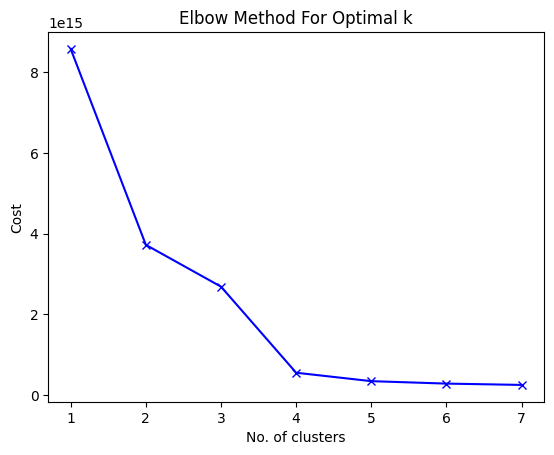

In [ ]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

# Elbow method to detect number of K
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='random', random_state=0)
        kprototype.fit_predict(dfMatrix, categorical=catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(range(1, len(cost) + 1), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
#let's build the Kprototype model with 4 clusters
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'random', random_state = 0)
df['clusters']= kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
# Add 1 to cluster labels
df['clusters'] += 1

In [ ]:
df.head()

,Time,Control,Tier,Course_Count,Avg_People_Goal,Course Group_Advanced,Course Group_Basic,Course Group_General,Customer Type,Target_Role A,...,Spend Group_Meat,Spend_Index_1,Spend_Index_3,Spend_Index_5,Spend_Index_6,Spend_Index_7,Spend_Index_8,Spend_Index_10,Spend_Index_Concatenated,clusters
0,A,Yes,Red,3,45.0,3,0,0,Invertebrates,0,...,26,18,20,20,8,6,0,0,22666,1
1,B,Yes,Red,4,101.5,4,0,0,Invertebrates,2,...,28,16,17,21,13,8,3,0,223656,1
2,C,Yes,Red,5,44.8,5,0,0,Invertebrates,4,...,28,15,18,22,13,7,3,0,223655,1
3,D,Yes,Red,8,70.5,8,0,0,Invertebrates,0,...,28,13,17,24,13,7,3,0,223754,1
4,E,Yes,Red,6,77.0,6,0,0,Invertebrates,1,...,29,12,23,20,14,7,3,0,224674,1


In [ ]:
df.to_csv('df_cluster.csv', index=False)
from google.colab import files
files.download('df_cluster.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Group by clusters and calculate summary statistics for numerical columns
summary_by_cluster = df.groupby('clusters').describe()

# Print the summary statistics
print(summary_by_cluster)


         Course_Count                                                    \
                count       mean        std  min  25%   50%   75%   max   
clusters                                                                  
1              4969.0   3.406319   4.108890  1.0  1.0   2.0   4.0  72.0   
2                 5.0   9.000000   2.000000  7.0  8.0   8.0  10.0  12.0   
3               321.0   6.753894   5.976924  1.0  2.0   5.0   9.0  36.0   
4                49.0  18.734694  19.177651  1.0  5.0  12.0  29.0  76.0   

         Avg_People_Goal             ... Spend_Index_10       \
                   count       mean  ...            75%  max   
clusters                             ...                       
1                 4969.0  79.975083  ...            0.0  0.0   
2                    5.0  66.730238  ...            3.0  3.0   
3                  321.0  86.753556  ...            2.0  4.0   
4                   49.0  86.613293  ...            7.0  9.0   

         Spend_Index_Conc

In [ ]:
import plotly.express as px

# Create a box plot
fig = px.box(df, x='clusters', y='Spend_Index_Concatenated', title='Spend Index by Cluster', labels={'clusters': 'Cluster', 'Spend_Index_Concatenated': 'Spend Index'})

# Show the plot
fig.show()


## **Cluster Analysis and Visualization**

In [ ]:
df_cluster = pd.read_csv("df_cluster_graph.csv")

In [ ]:
df_cluster.head()

,Time,Control,Tier,Course_Count,Avg_People_Goal,Course Group_Advanced,Course Group_Basic,Course Group_General,Customer Type,Target_Role A,...,Spend Group_Meat,Spend_Index_1,Spend_Index_3,Spend_Index_5,Spend_Index_6,Spend_Index_7,Spend_Index_8,Spend_Index_10,Spend_Index_Concatenated,clusters
0,A,Yes,Red,3,45.0,3,0,0,Invertebrates,0,...,26,18,20,20,8,6,0,0,22666,1
1,B,Yes,Red,4,101.5,4,0,0,Invertebrates,2,...,28,16,17,21,13,8,3,0,223656,1
2,C,Yes,Red,5,44.8,5,0,0,Invertebrates,4,...,28,15,18,22,13,7,3,0,223655,1
3,D,Yes,Red,8,70.5,8,0,0,Invertebrates,0,...,28,13,17,24,13,7,3,0,223754,1
4,E,Yes,Red,6,77.0,6,0,0,Invertebrates,1,...,29,12,23,20,14,7,3,0,224674,1


In [ ]:
df_cluster

,Time,Control,Tier,Course_Count,Avg_People_Goal,Course Group_Advanced,Course Group_Basic,Course Group_General,Customer Type,Target_Role A,...,Spend Group_Meat,Spend_Index_1,Spend_Index_3,Spend_Index_5,Spend_Index_6,Spend_Index_7,Spend_Index_8,Spend_Index_10,Spend_Index_Concatenated,clusters
0,A,Yes,Red,3,45.000,3,0,0,Invertebrates,0,...,26,18,20,20,8,6,0,0,22666,1
1,B,Yes,Red,4,101.500,4,0,0,Invertebrates,2,...,28,16,17,21,13,8,3,0,223656,1
2,C,Yes,Red,5,44.800,5,0,0,Invertebrates,4,...,28,15,18,22,13,7,3,0,223655,1
3,D,Yes,Red,8,70.500,8,0,0,Invertebrates,0,...,28,13,17,24,13,7,3,0,223754,1
4,E,Yes,Red,6,77.000,6,0,0,Invertebrates,1,...,29,12,23,20,14,7,3,0,224674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,D,Yes,Red,2,30.000,2,0,0,Invertebrates,0,...,18,3,15,13,9,0,0,0,2441,1
5340,F,Yes,Red,1,23.000,1,0,0,Invertebrates,0,...,19,7,14,11,11,0,0,0,3342,1
5341,A,No,Unkown,2,31.000,2,0,0,Invertebrates,0,...,1,0,1,0,0,0,0,0,0,1
5342,B,No,Unkown,8,31.375,8,0,0,Invertebrates,0,...,1,0,1,0,0,0,0,0,0,1


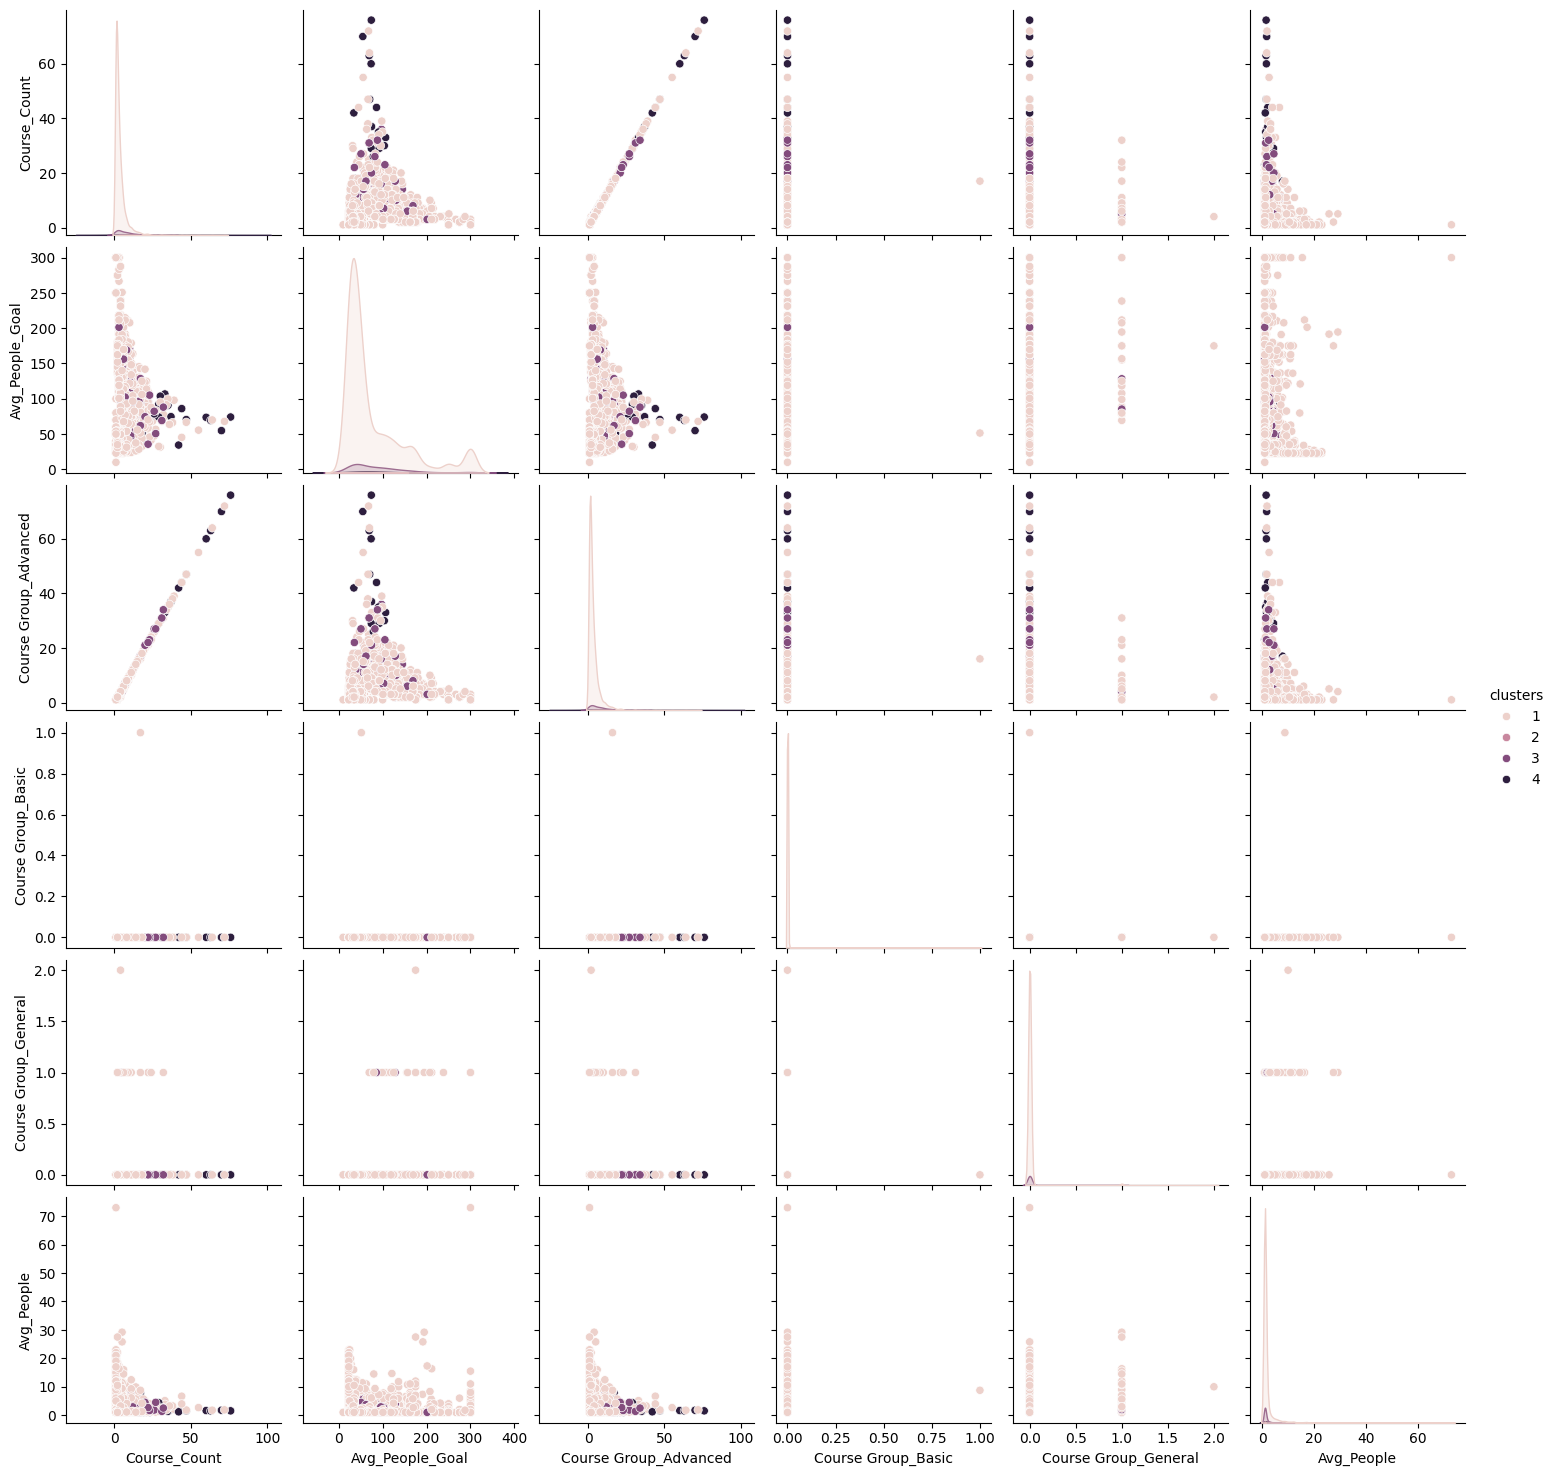

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numerical columns
course_columns = ['Course_Count', 'Avg_People_Goal', 'Course Group_Advanced', 'Course Group_Basic', 'Course Group_General', 'Avg_People','clusters']

# Create pairplot
sns.pairplot(df_cluster[course_columns], hue='clusters', diag_kind='kde')
plt.show()


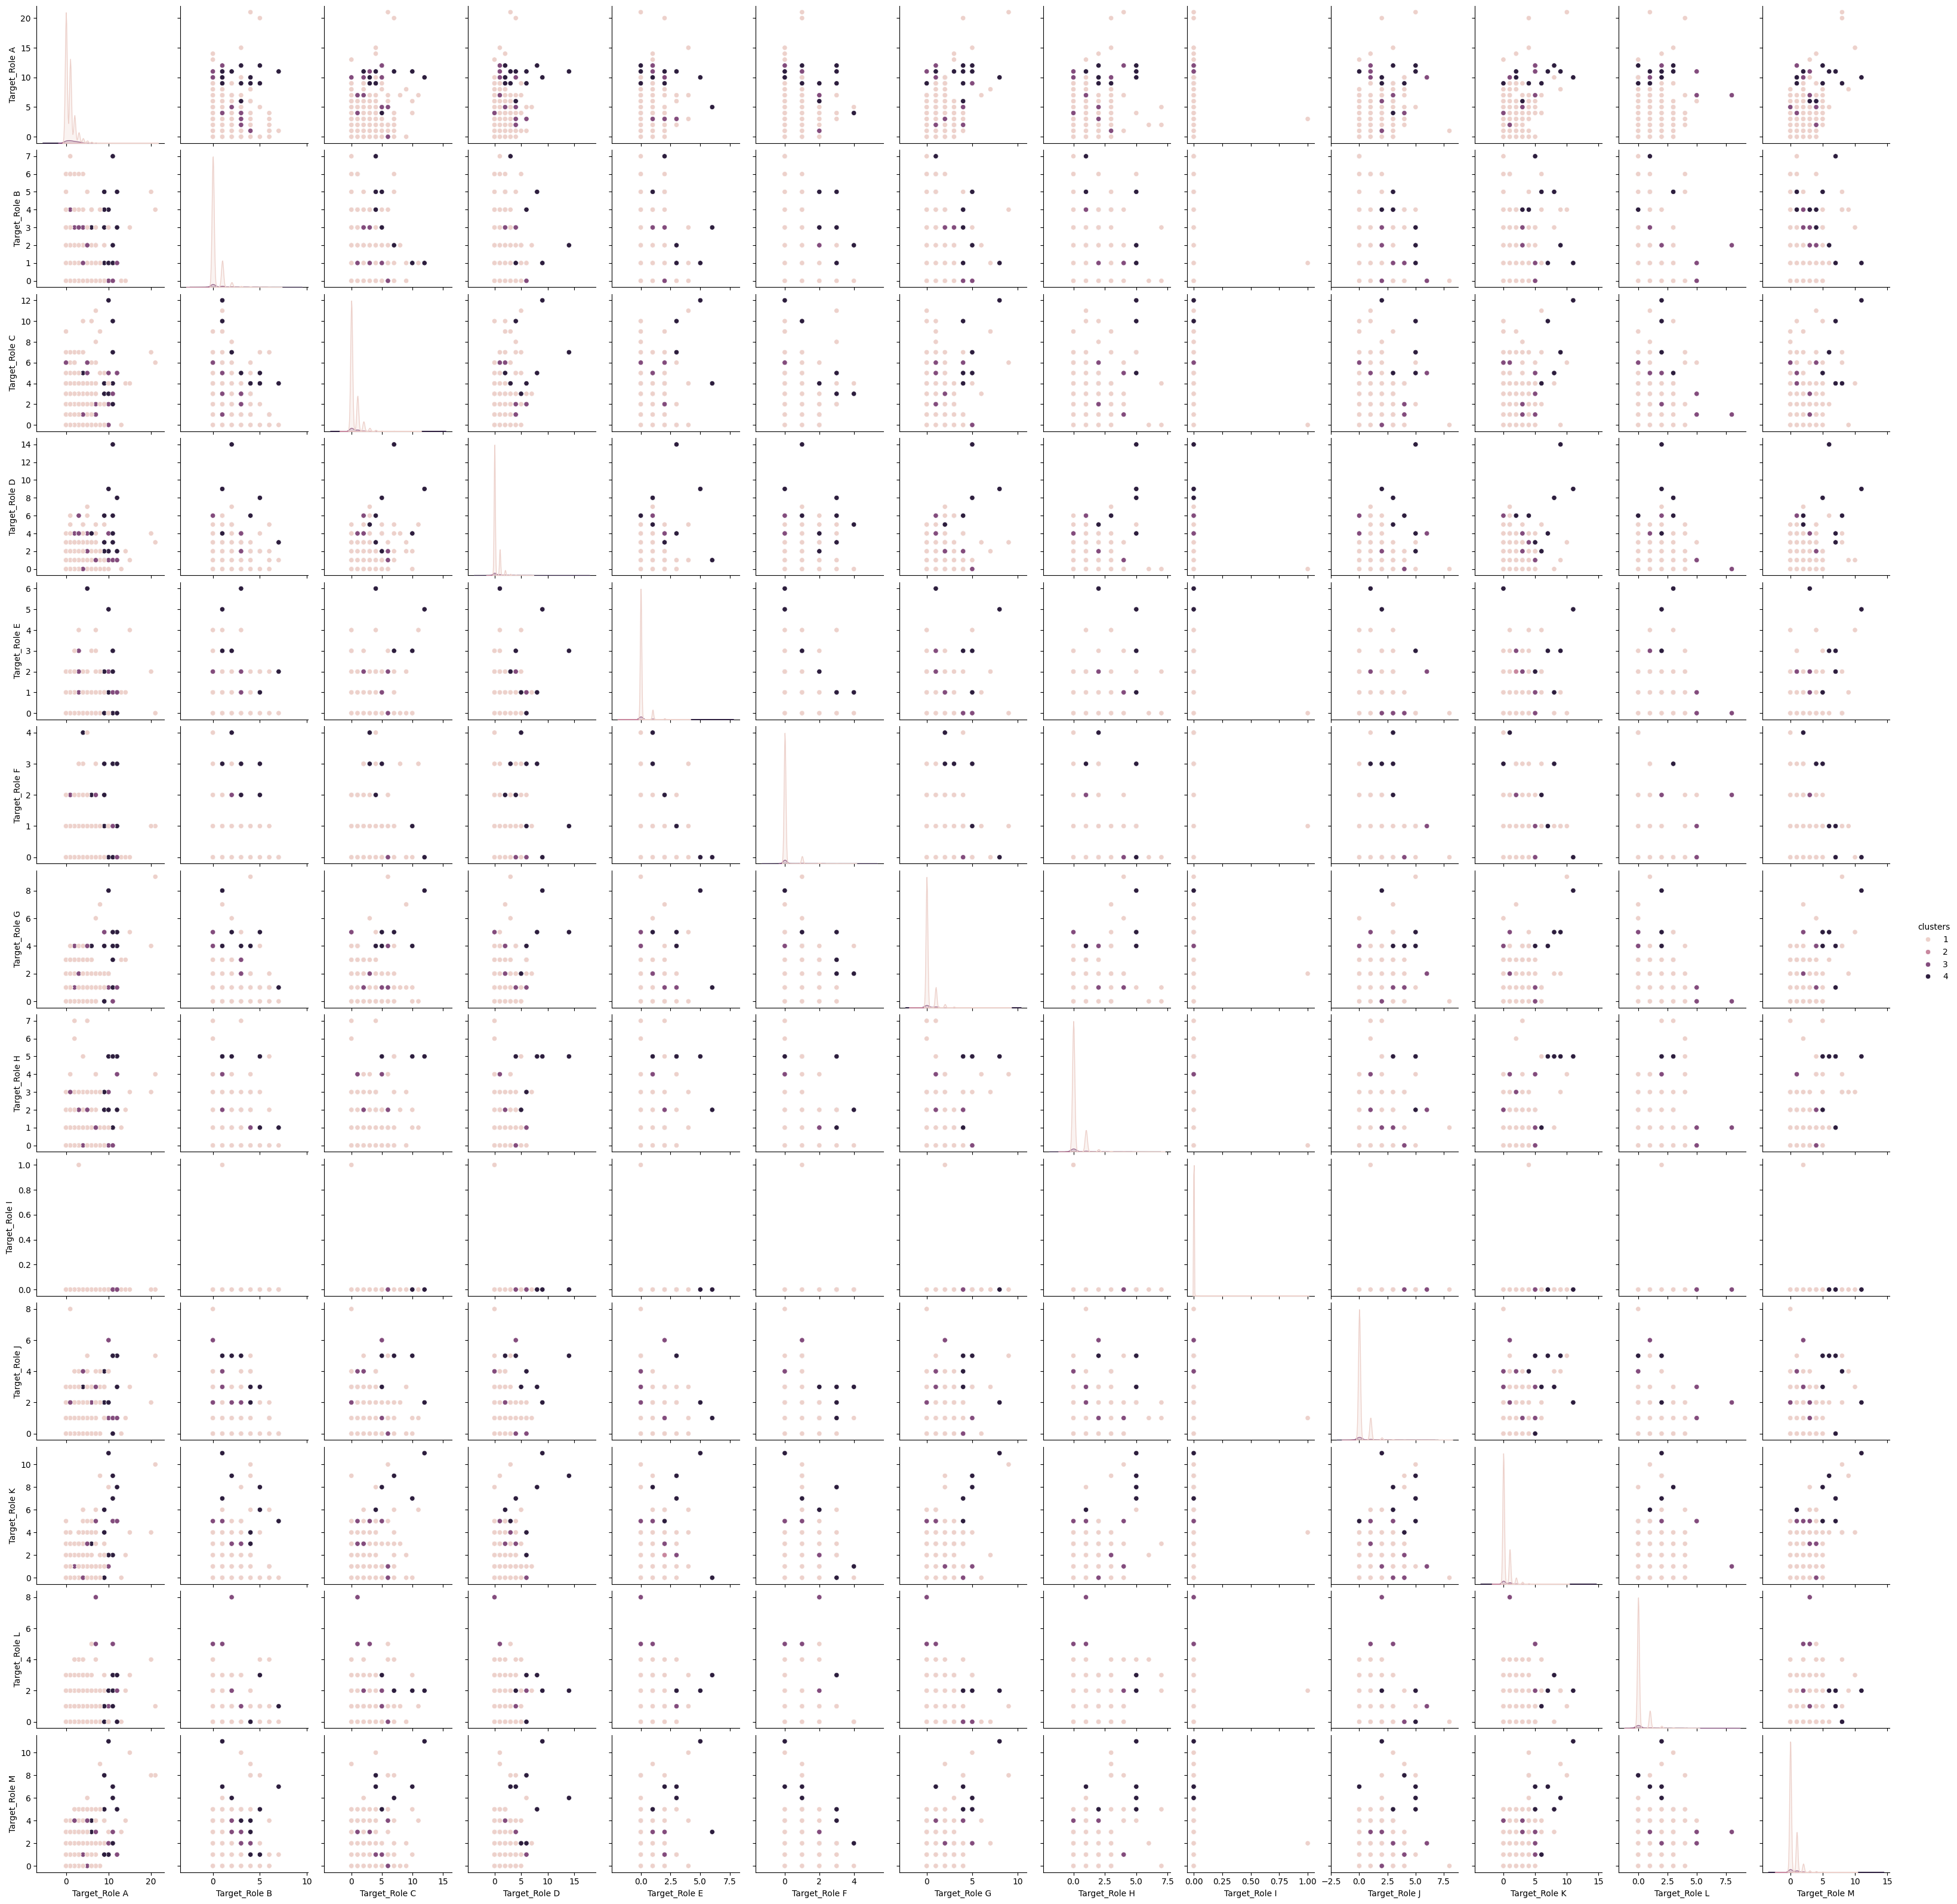

In [ ]:
# Extract numerical columns
role_columns = ['Target_Role A','Target_Role B','Target_Role C','Target_Role D','Target_Role E','Target_Role F','Target_Role G','Target_Role H','Target_Role I','Target_Role J','Target_Role K','Target_Role L','Target_Role M','clusters']

# Create pairplot
sns.pairplot(df_cluster[role_columns], hue='clusters', diag_kind='kde')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

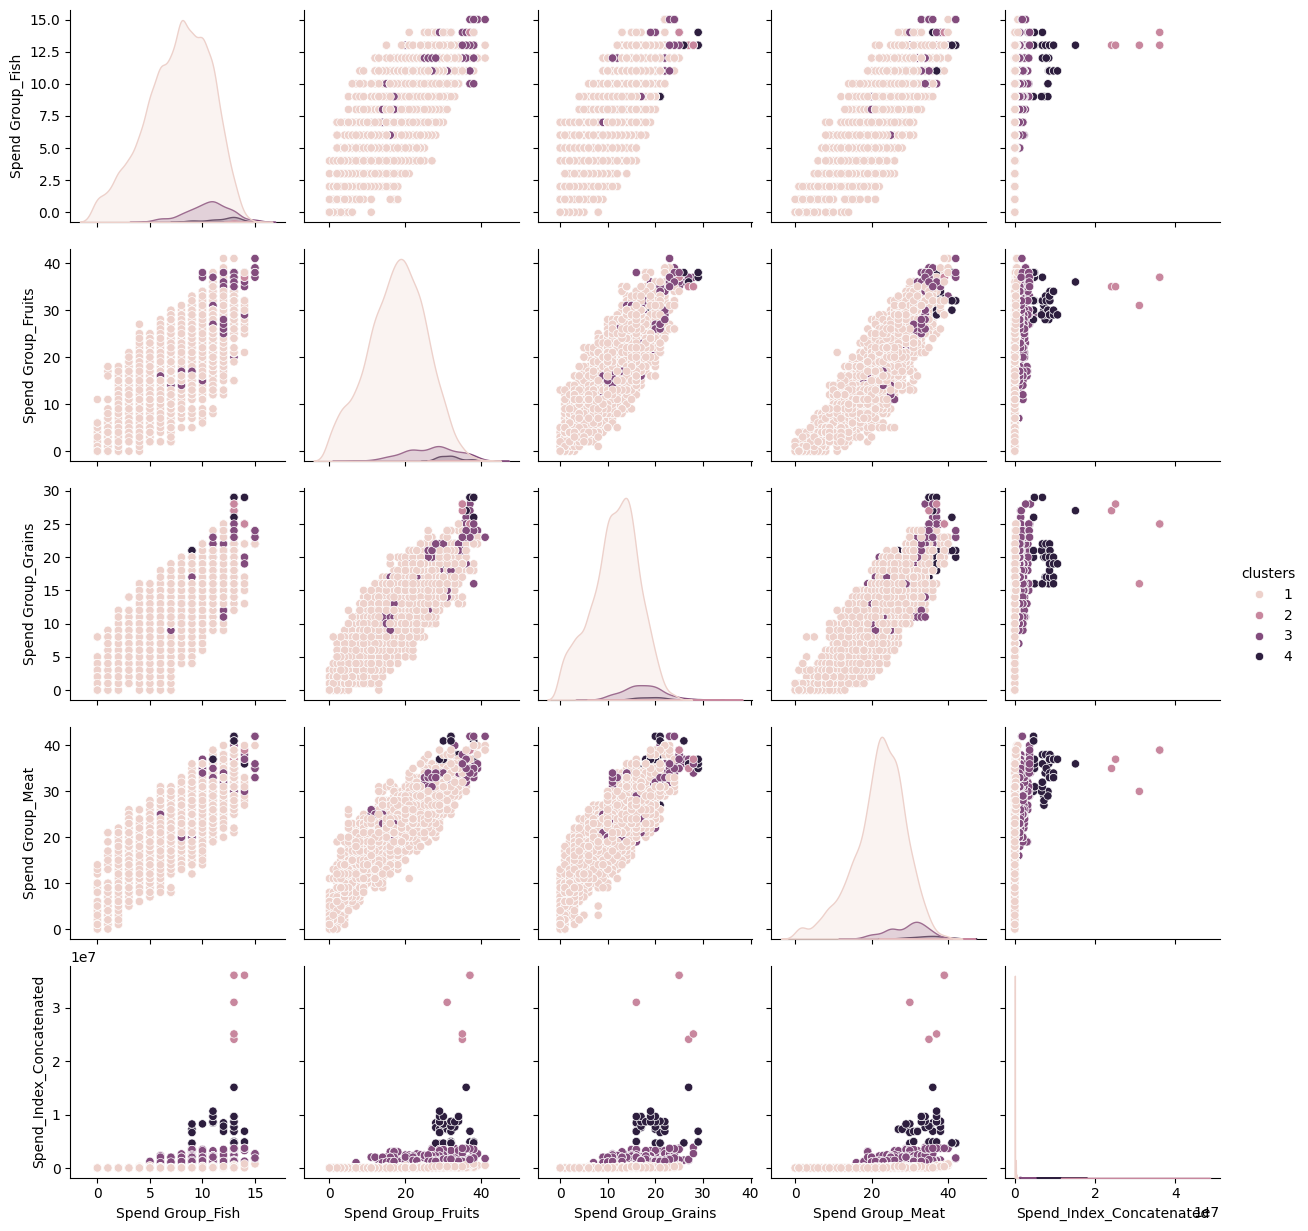

In [ ]:

# Extract numerical columns
spend_columns = ['Spend Group_Fish','Spend Group_Fruits','Spend Group_Grains','Spend Group_Meat','Spend_Index_Concatenated','clusters']
# Create pairplot
sns.pairplot(df_cluster[spend_columns], hue='clusters', diag_kind='kde')
plt.show()

In [ ]:
import plotly.express as px

categorical_columns = ['Time', 'Control', 'Tier', 'Customer Type', 'Location', 'Business']

# Initialize an empty list to store the plots
plots = []

# Loop through each categorical column
for column in categorical_columns:
    # Group the DataFrame by Cluster and the current categorical column, then count the occurrences
    grouped = df_cluster.groupby(['clusters', column]).size().reset_index(name='Frequency')

    # Filter to only include clusters 1, 2, 3, and 4
    grouped = grouped[grouped['clusters'].isin([1, 2, 3, 4])]

    # Calculate the total count of each category within each cluster
    total_counts = grouped.groupby('clusters')['Frequency'].sum()

    # Merge the grouped DataFrame with the total counts
    merged = grouped.merge(total_counts, on='clusters', suffixes=('', '_total'))

    # Calculate the percentage of each category within each cluster
    merged['Percentage'] = (merged['Frequency'] / merged['Frequency_total']) * 100

    # Round the Percentage column to two decimal places
    merged['Percentage'] = merged['Percentage'].round(2)

    # Pivot the DataFrame to have categories as columns
    pivot_table = merged.pivot(index='clusters', columns=column, values='Percentage').fillna(0)

    # Create the heatmap using Plotly Express
    fig = px.imshow(pivot_table.values,
                    labels=dict(x=column, y="Cluster", color="Percentage"),
                    x=pivot_table.columns,
                    y=pivot_table.index,
                    color_continuous_scale='Blues',
                    zmin=0,
                    zmax=100,
                    width=800, height=500)

    # Add rounded percentage values as text annotations
    for i in range(len(pivot_table.index)):
        for j in range(len(pivot_table.columns)):
            fig.add_annotation(x=pivot_table.columns[j], y=pivot_table.index[i],
                               text=str(round(pivot_table.values[i, j])) + '%',
                               showarrow=False, font=dict(color='black'))

    # Update layout to set specific y-axis ticks
    fig.update_layout(
        title=f'Percentage of {column} within Clusters',
        xaxis_title=column,
        yaxis_title='Cluster',
        yaxis=dict(
            tickmode='array',
            tickvals=[1, 2, 3, 4],
            ticktext=['1', '2', '3', '4']
        )
    )

    plots.append(fig)

# Display the plots
for plot in plots:
    plot.show()


In [ ]:
# Replace cluster numbers with the given names
cluster_names = {
    1: 'Exploratory users',
    2: 'High Value Investors',
    3: 'Moderate Contributors',
    4: 'Diverse Leaders'
}

# Assuming you have a column 'clusters' for cluster assignments
df_cluster['cluster_name'] = df_cluster['clusters'].map(cluster_names)

# Calculate the mean of Spend_Index_Concatenated for each cluster
mean_spend_by_cluster = df_cluster.groupby('cluster_name')['Spend_Index_Concatenated'].mean().reset_index()

# Sort the DataFrame by the specified cluster order
cluster_order = ['Exploratory users', 'High Value Investors', 'Moderate Contributors', 'Diverse Leaders']
mean_spend_by_cluster['cluster_name'] = pd.Categorical(mean_spend_by_cluster['cluster_name'], categories=cluster_order, ordered=True)
mean_spend_by_cluster = mean_spend_by_cluster.sort_values('cluster_name')

# Create the bar plot using Plotly Express
fig = px.bar(mean_spend_by_cluster,
             x='cluster_name',
             y='Spend_Index_Concatenated',
             title='Mean Spend Index by Cluster',
             labels={'Spend_Index_Concatenated': 'Mean Spend Index', 'cluster_name': 'Cluster'},
             category_orders={'cluster_name': cluster_order})

# Display the plot
fig.show()